<a href="https://colab.research.google.com/github/ahmedyasser7/DEPI_GP/blob/main/visuallization_p_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import datetime
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from IPython.display import display
import plotly.graph_objects as go
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [17]:
accidents = '/content/drive/My Drive/accident_cleaned_data.csv'
vechiles = '/content/drive/My Drive/Vechicles_cleaned _data.csv'




In [37]:
df_acc = pd.read_csv(accidents)
data = df_vech = pd.read_csv(vechiles)



In [38]:
df=df_acc

# Heatmap of Severity by Light Conditions

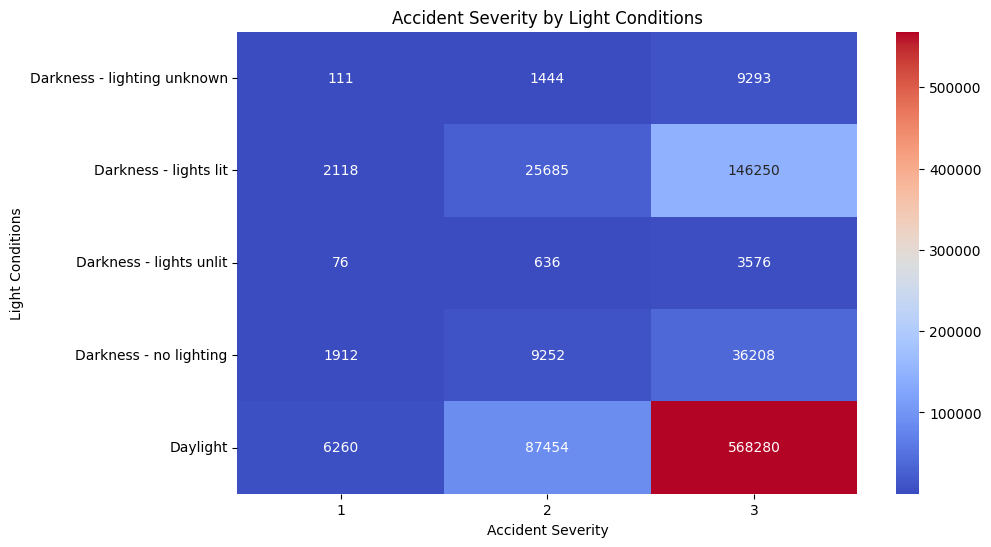

In [6]:
# Creating labels for conditions
df['Light_Conditions_Label'] = df['Light_Conditions'].map({
    1: 'Daylight', 4: 'Darkness - lights lit', 5: 'Darkness - lights unlit',
    6: 'Darkness - no lighting', 7: 'Darkness - lighting unknown'
})

df['Weather_Conditions_Label'] = df['Weather_Conditions'].map({
    1: 'Fine no high winds', 2: 'Raining no high winds', 3: 'Snowing no high winds',
    4: 'Fine + high winds', 5: 'Raining + high winds', 6: 'Snowing + high winds',
    7: 'Fog or mist', 8: 'Other', 9: 'Unknown'
})

df['Road_Surface_Label'] = df['Road_Surface_Conditions'].map({
    1: 'Dry', 2: 'Wet or damp', 3: 'Snow', 4: 'Frost or ice', 5: 'Flood over 3cm',
    6: 'Oil or diesel', 7: 'Mud'
})

# Heatmap of Severity by Light Conditions
plt.figure(figsize=(10, 6))
severity_light_pivot = df.pivot_table(index='Light_Conditions_Label', columns='Accident_Severity', aggfunc='size', fill_value=0)
sns.heatmap(severity_light_pivot, annot=True, fmt="d", cmap='coolwarm')
plt.title('Accident Severity by Light Conditions')
plt.ylabel('Light Conditions')
plt.xlabel('Accident Severity')
plt.show()


# Accidents by Urban or Rural Areas

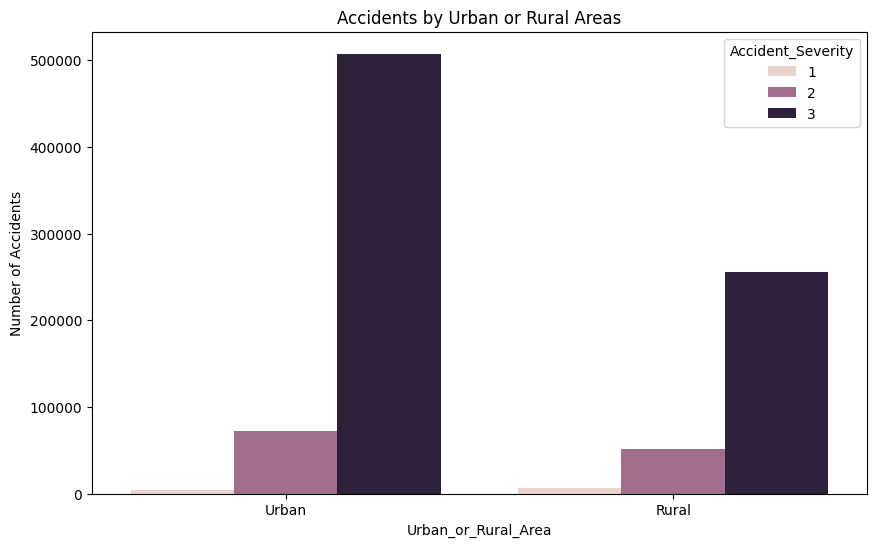

In [7]:
# Filter out unallocated
df = df[df['Urban_or_Rural_Area'] != 3]

# Create bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Urban_or_Rural_Area', data=df, hue='Accident_Severity')
plt.title('Accidents by Urban or Rural Areas')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=[0, 1], labels=['Urban', 'Rural'])
plt.show()


# Distribution of Accidents by Severity

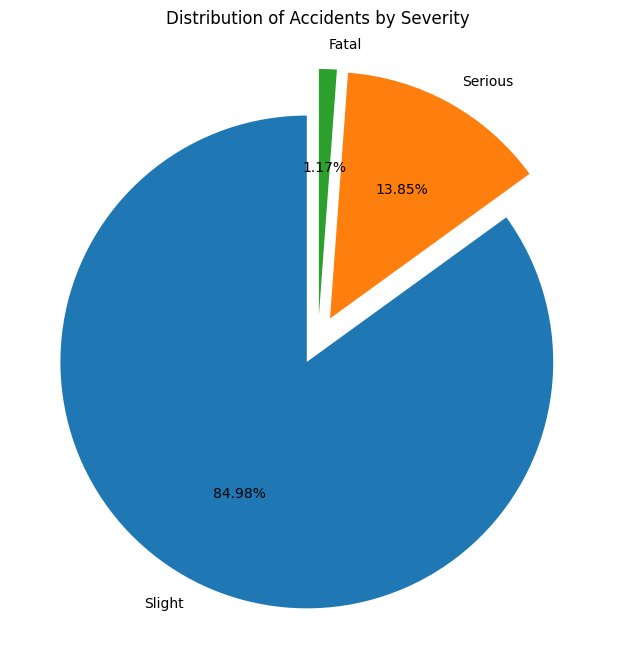

In [8]:
import matplotlib.pyplot as plt

# Define the severity labels and map them
severity_labels = {1: 'Fatal', 2: 'Serious', 3: 'Slight'}
df['Accident_Severity_Label'] = df['Accident_Severity'].map(severity_labels)

# Calculate the explode values to separate the slices
explode = [0.1] * df['Accident_Severity_Label'].nunique()  # Adjust the distance as needed

# Plot the pie chart
plt.figure(figsize=(8, 8))
df['Accident_Severity_Label'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%',
    startangle=90,
    explode=explode  # Add the explode parameter
)

plt.title('Distribution of Accidents by Severity')
plt.ylabel('')  # Remove the y-label
plt.show()


# Heatmap of Accidents by Day of the Week and Hour

In [10]:
# Extract the hour by taking the first two characters and convert to integer
df['Hour'] = df['Time'].str.slice(0, 2).astype(int)

# Verify the extraction
print(df[['Time', 'Hour']].head())


       Time  Hour
0  15:11:00    15
1  10:59:00    10
2  14:19:00    14
3  08:10:00     8
4  17:25:00    17


In [12]:
# Identify any invalid hour entries
invalid_hours = df[(df['Hour'] < 0) | (df['Hour'] > 23)]

if not invalid_hours.empty:
    print("Invalid hour entries detected:")
    print(invalid_hours['Time'].unique())

    # Optionally, decide how to handle them (e.g., remove or fill with a default value)
    # For example, removing invalid entries:
    df = df.drop(invalid_hours.index)
else:
    print("All hour entries are valid.")


All hour entries are valid.


In [16]:
day_labels = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}
df['Day_of_Week_Label'] = df['Day_of_Week'].map(day_labels)

# Create a pivot table for the heatmap
heatmap_data = df.groupby(['Day_of_Week_Label', 'Hour']).agg({
    'Accident_Index': 'count'
}).reset_index().pivot(index='Day_of_Week_Label', columns='Hour', values='Accident_Index').fillna(0)
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Sort the days in the correct order
heatmap_data = heatmap_data.reindex(day_order)

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='YlOrRd',
    colorbar=dict(title='Number of Accidents')
))

fig.update_layout(
    title='Heatmap of Accidents by Day of the Week and Hour',
    xaxis_title='Hour of the Day',
    yaxis_title='Day of the Week'
)

fig.show()


In [19]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

# Vehicle Type

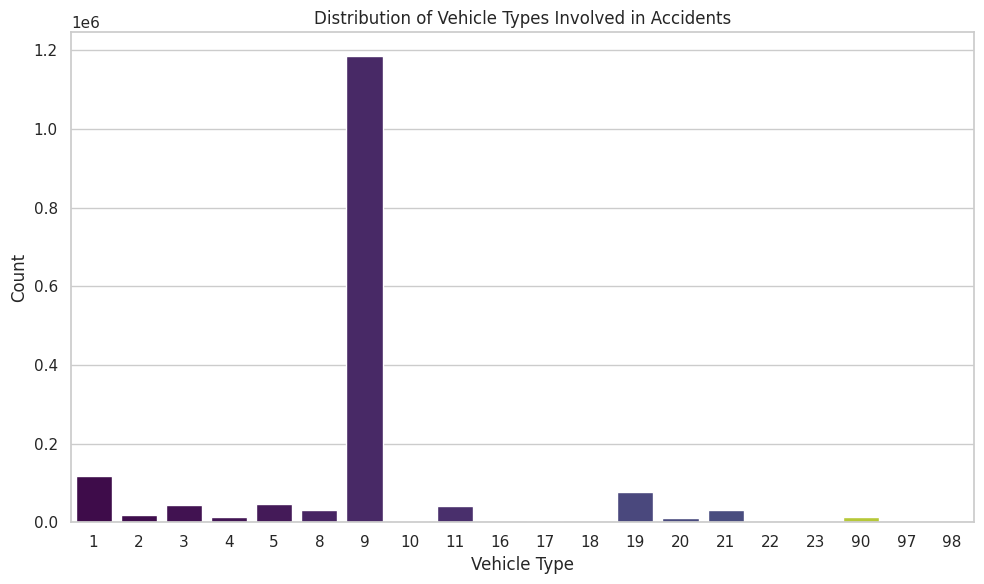

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Vehicle_Type', hue='Vehicle_Type', palette='viridis', legend=False)
plt.title('Distribution of Vehicle Types Involved in Accidents')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

vehicle_type_labels = {

    1: 'Pedal cycle',
    2: 'Motorcycle 50cc and under',
    3: 'Motorcycle 125cc and under',
    4: 'Motorcycle over 125cc and up to 500cc',
    5: 'Motorcycle over 500cc',
    8: 'Taxi/Private hire car',
    9: 'Car',
    10: 'Minibus (8 - 16 passenger seats)',
    11: 'Bus or coach (17 or more pass seats)',
    16: 'Ridden horse',
    17: 'Agricultural vehicle',
    18: 'Tram',
    19: 'Van / Goods 3.5 tonnes mgw or under',
    20: 'Goods over 3.5t. and under 7.5t',
    21: 'Goods 7.5 tonnes mgw and over',
    22: 'Mobility scooter',
    23: 'Electric motorcycle',
    90: 'Other vehicle',
    97: 'Motorcycle - unknown cc',
    98: 'Goods vehicle - unknown weight'
}



# Age of Driver

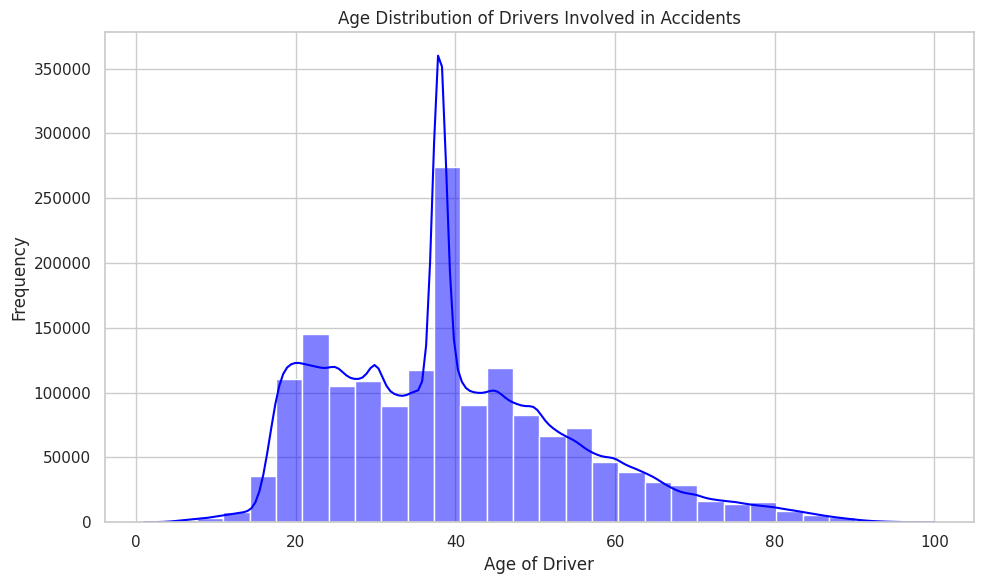

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age_of_Driver'], bins=30, color='blue', kde=True)
plt.title('Age Distribution of Drivers Involved in Accidents')
plt.xlabel('Age of Driver')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Sex of Driver

<ipython-input-27-90bbca4ef6db>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




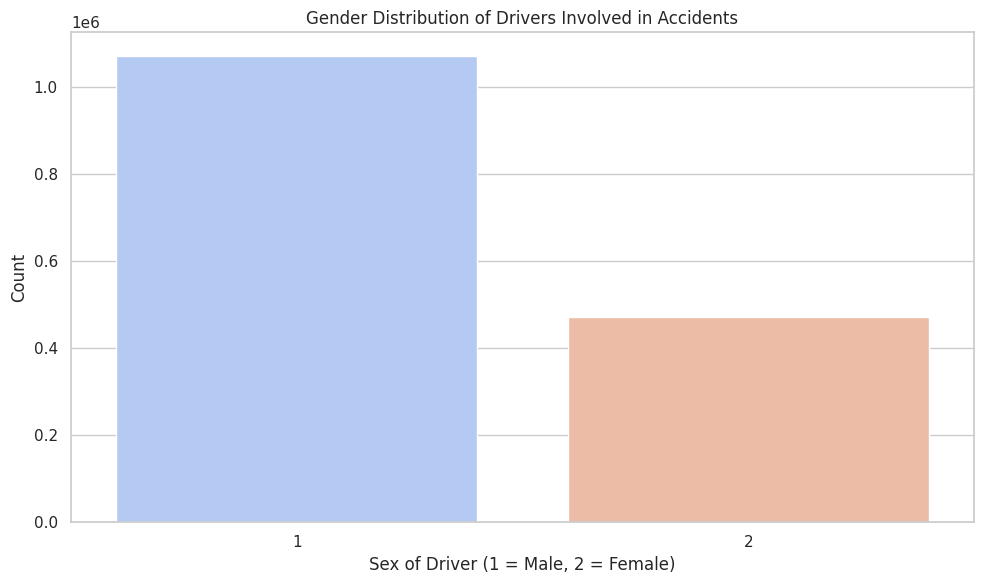

In [27]:
# Filter the data to exclude rows where 'Sex_of_Driver' is 3
filtered_data = data[data['Sex_of_Driver'].isin([1, 2])]

# Plotting the countplot with the filtered data
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='Sex_of_Driver', palette='coolwarm', legend=False)
plt.title('Gender Distribution of Drivers Involved in Accidents')
plt.xlabel('Sex of Driver (1 = Male, 2 = Female)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Age of Vehicles Involved in Accidents

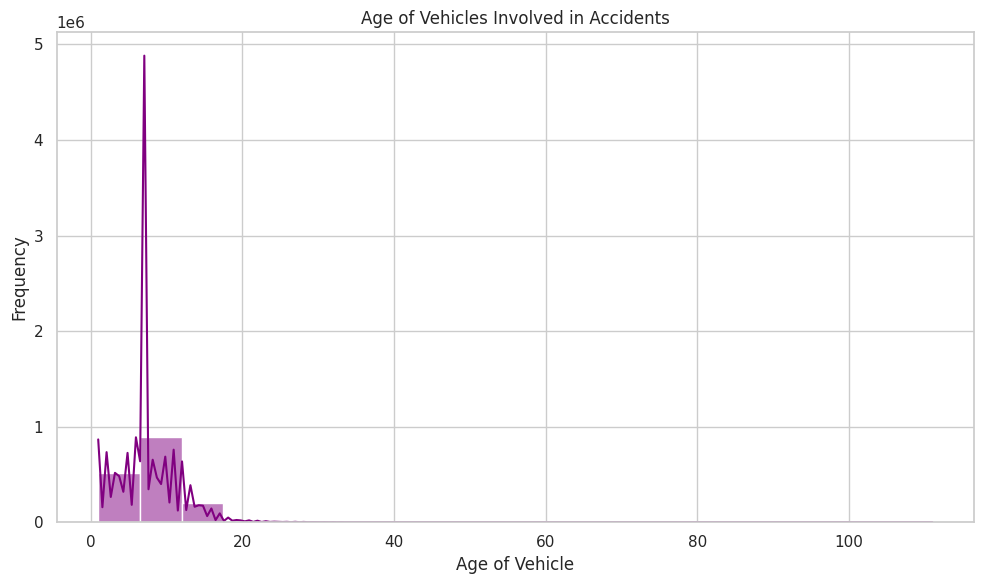

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age_of_Vehicle'], bins=20, color='purple', kde=True)
plt.title('Age of Vehicles Involved in Accidents')
plt.xlabel('Age of Vehicle')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Journey Purpose of Driver

<ipython-input-40-507c6702cd33>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




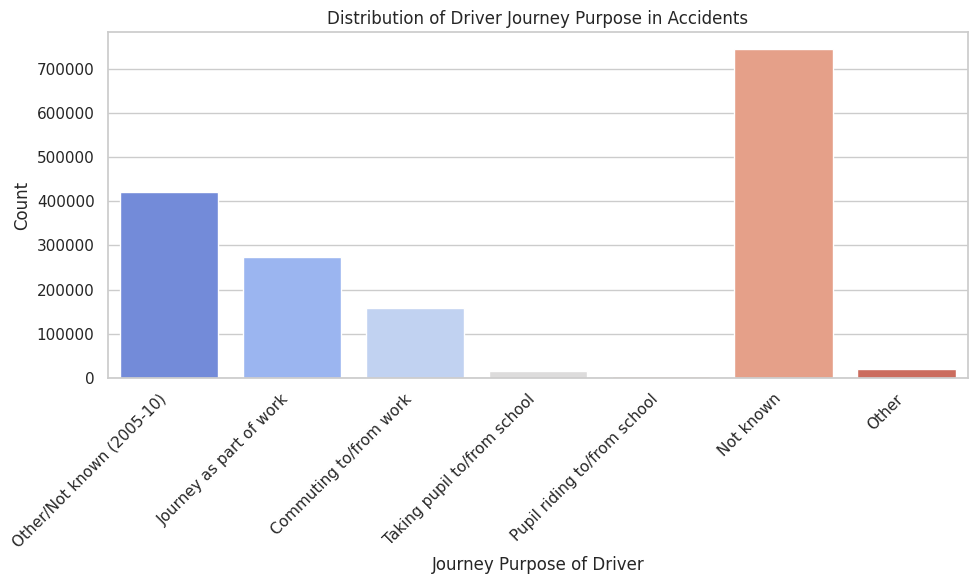

In [40]:
# Mapping the coded values to descriptive labels
journey_purpose_labels = {
    1: 'Journey as part of work',
    2: 'Commuting to/from work',
    3: 'Taking pupil to/from school',
    4: 'Pupil riding to/from school',
    5: 'Other',
    6: 'Not known',
    15: 'Other/Not known (2005-10)'
}

# Replace the coded values with the labels in the DataFrame
data['Journey_Purpose_of_Driver'] = data['Journey_Purpose_of_Driver'].map(journey_purpose_labels)

# Plotting the countplot with the updated labels
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Journey_Purpose_of_Driver', palette='coolwarm')
plt.title('Distribution of Driver Journey Purpose in Accidents')
plt.xlabel('Journey Purpose of Driver')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()
plt.show()
